In [1]:
import locale
def getpreferredencoding(do_set=True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [2]:
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [3]:
%pip install opencv-python-headless

In [4]:
!pip install GPUtil

  Preparing metadata (setup.py) ... done
  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7392 sha256=1946ecbc6ab8a5f72b6b81f25080f6e111c194f54735bcde064d8856493daebb
  Stored in directory: /root/.cache/pip/wheels/2b/4d/8f/55fb4f7b9b591891e8d3f72977c4ec6c7763b39c19f0861595
Successfully built GPUtil


In [5]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.6/922.6 kB 53.8 MB/s eta 0:00:00


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
%pip install torch
%pip install numba
%pip install GPUtil

import torch
from numba import cuda
from GPUtil import showUtilization as gpu_usage

# load the facemask dataset**

In [8]:
%cd  /content/drive/MyDrive

/content/drive/MyDrive


In [9]:
%cd /content/drive/MyDrive/facemask_project/demo/demo_files/

/content/drive/MyDrive/facemask_project/demo/demo_files


In [ ]:
# run the code below onlly once!

zip_file_path = 'face-mask-detection.zip'

# Unzip the file in the current directory
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('.')

print("Unzipping completed.")

Unzipping completed.


In [10]:
ls

 annotations/      dataset_files/               images/          model.png              yolov8n.pt
 app.py            data.yaml                    labels.csv       runs/
 children/         face_mask_detection_cnn.h5   main_cnn.ipynb  'Untitled5 (3).ipynb'
 cropped_images/   face-mask-detection.zip      main.ipynb       yolo11n.pt


# 1. Preprocess the data

In [12]:
import os

In [13]:
annotations_dir = '/content/drive/MyDrive/facemask_project/demo/demo_files/annotations'
annotation_files = os.listdir(annotations_dir)

# Read the first annotation file
first_annotation_file = os.path.join(annotations_dir, annotation_files[0])
with open(first_annotation_file, 'r') as f:
    contents = f.read()
    print(contents)


<annotation>
    <folder>images</folder>
    <filename>maksssksksss0.png</filename>
    <size>
        <width>512</width>
        <height>366</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>without_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>79</xmin>
            <ymin>105</ymin>
            <xmax>109</xmax>
            <ymax>142</ymax>
        </bndbox>
    </object>
    <object>
        <name>with_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>185</xmin>
            <ymin>100</ymin>
            <xmax>226</xmax>
            <ymax>144</ymax>
        </bndbox>
    </object>
    <object>
        <name>without_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</

In [15]:
from PIL import Image

In [16]:
images_dir = '/content/drive/MyDrive/facemask_project/demo/demo_files/images'
image_files = os.listdir(images_dir)

# Read the first image file
first_image_file = os.path.join(images_dir, image_files[0])
first_image = Image.open(first_image_file)
first_image.show()

**content of annotations and images folder**:

annotations cntains metadata about the images stored in the images folder. This metadata can include information such as labels, bounding boxes, segmentation masks, or any other relevant data that describes the content of the images.

The images folder contains the actual image files that are being annotated.

In [23]:
import glob
import xml.etree.ElementTree as et
import pandas as pd

In [21]:
# Define the path to the XML files
xml_files = glob.glob('/content/drive/MyDrive/facemask_project/demo/demo_files/annotations/*.xml')

# Initialize a dictionary to store object information
object_info = {
    'filename': [],
    'width': [],
    'height': [],
    'xmin': [],
    'xmax': [],
    'ymin': [],
    'ymax': [],
    'name': []
}

# Iterate over each XML file
for path in xml_files:
    # Parse the XML file
    tree = et.parse(path)
    root = tree.getroot()

    # Extract filename
    fname = root.find('filename').text

    # Extract image size
    size = root.find('size')
    width = size.find('width').text
    height = size.find('height').text

    # Extract object information
    for obj in root.findall('object'):
        bbox_info = obj.find('bndbox')
        name = obj.find('name').text
        xmin = bbox_info.find('xmin').text
        xmax = bbox_info.find('xmax').text
        ymin = bbox_info.find('ymin').text
        ymax = bbox_info.find('ymax').text

        # Append extracted information to the dictionary
        object_info['filename'].append(fname)
        object_info['width'].append(width)
        object_info['height'].append(height)
        object_info['xmin'].append(xmin)
        object_info['xmax'].append(xmax)
        object_info['ymin'].append(ymin)
        object_info['ymax'].append(ymax)
        object_info['name'].append(name)

In [24]:
# Convert the object_info dictionary to a DataFrame
df_annotations = pd.DataFrame(object_info)

# Columns to be converted to float
columns_to_convert = ['width', 'height', 'xmin', 'xmax', 'ymin', 'ymax']
df_annotations[columns_to_convert] = df_annotations[columns_to_convert].astype('float32')

# Save the DataFrame to a CSV file
df_annotations.to_csv('labels.csv', index=False)

In [25]:
# Display the first rows in the DataFrame
df_annotations.head()

,filename,width,height,xmin,xmax,ymin,ymax,name
0,maksssksksss0.png,512.0,366.0,79.0,109.0,105.0,142.0,without_mask
1,maksssksksss0.png,512.0,366.0,185.0,226.0,100.0,144.0,with_mask
2,maksssksksss0.png,512.0,366.0,325.0,360.0,90.0,141.0,without_mask
3,maksssksksss1.png,400.0,156.0,321.0,354.0,34.0,69.0,with_mask
4,maksssksksss1.png,400.0,156.0,224.0,261.0,38.0,73.0,with_mask


do we need to resize the images to a specific size? if yes, what is the size?

In [26]:
df_annotations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4072 entries, 0 to 4071
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   filename  4072 non-null   object 
 1   width     4072 non-null   float32
 2   height    4072 non-null   float32
 3   xmin      4072 non-null   float32
 4   xmax      4072 non-null   float32
 5   ymin      4072 non-null   float32
 6   ymax      4072 non-null   float32
 7   name      4072 non-null   object 
dtypes: float32(6), object(2)
memory usage: 159.2+ KB


Visualize the distribution of each class (mask, no mask, mask incorrect)

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

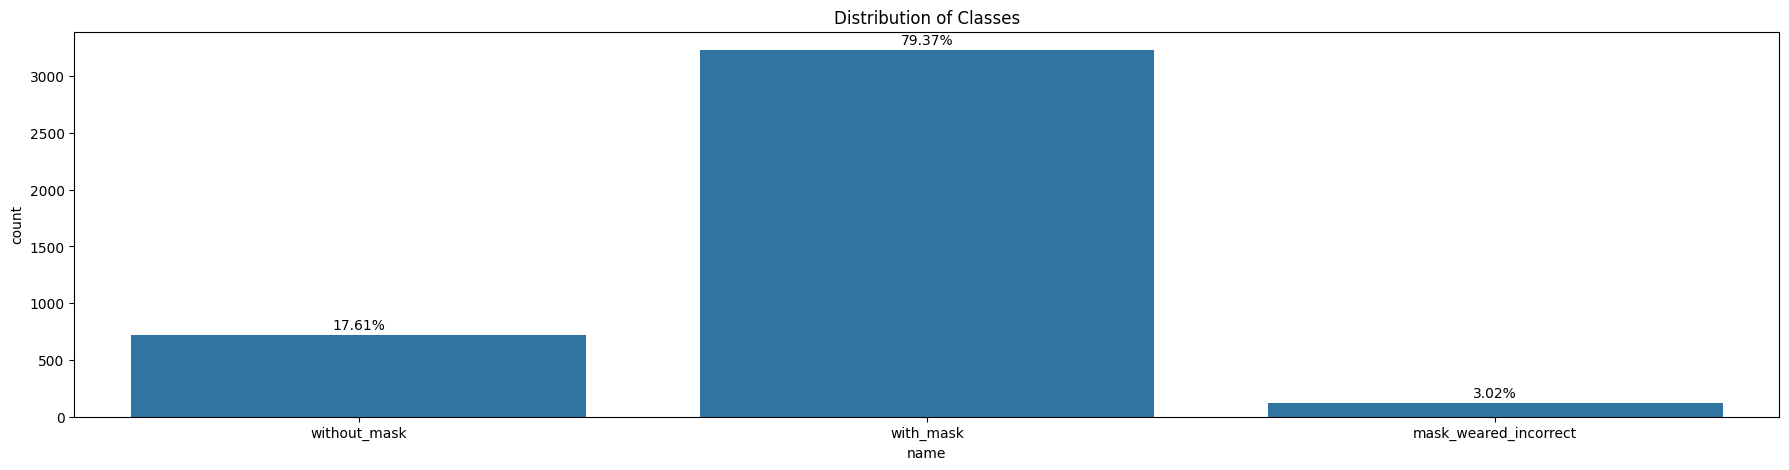

In [31]:
# Visualize the distribution
plt.figure(figsize=(22, 5))
sns.countplot(x='name', data=df_annotations)
plt.title('Distribution of Classes')
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x()+p.get_width()/2., height + 50, '{:1.2f}%'.format(100*height/len(df_annotations)), ha="center")
plt.show()

In [32]:
mask_clases = df_annotations['name'].value_counts()
mask_clases

,count
name,
with_mask,3232
without_mask,717
mask_weared_incorrect,123


## Visualize some images and its annotations

## first image

In [33]:
# Display image
first_image_file = os.path.join(images_dir, image_files[0])
second_image = Image.open(first_image_file)
second_image.show()

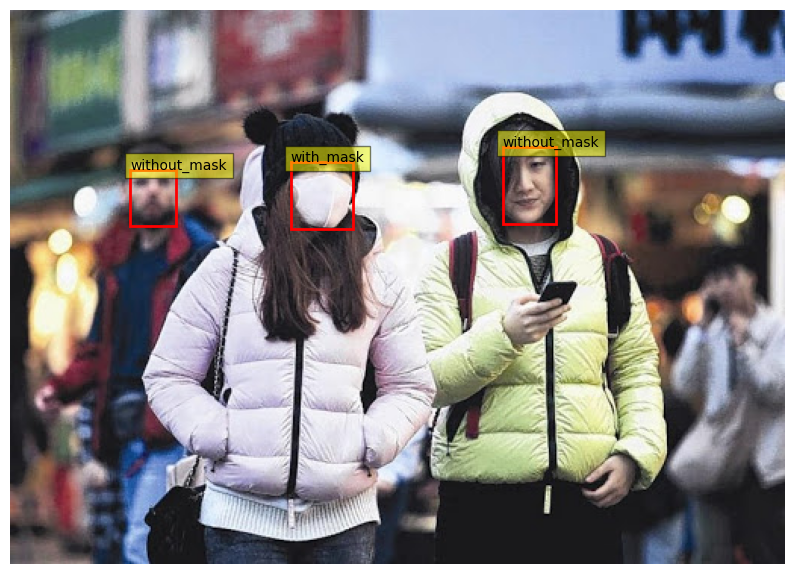

In [34]:
def plot_bounding_boxes(image_path, annotations):
    image = Image.open(image_path)
    plt.figure(figsize=(10, 10))
    plt.imshow(image)

    for _, row in annotations.iterrows():
        xmin, ymin, xmax, ymax = row['xmin'], row['ymin'], row['xmax'], row['ymax']
        plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, edgecolor='red', facecolor='none', linewidth=2))
        plt.text(xmin, ymin, row['name'], bbox=dict(facecolor='yellow', alpha=0.5))

    plt.axis('off')
    plt.show()

# Filter annotations for the image
first_image_annotations = df_annotations[df_annotations['filename'] == os.path.basename(first_image_file)]

# Plot bounding boxes on the image
plot_bounding_boxes(first_image_file, first_image_annotations)

## second image

In [35]:
# Display image
second_image_file = os.path.join(images_dir, image_files[1])
second_image = Image.open(second_image_file)
second_image.show()

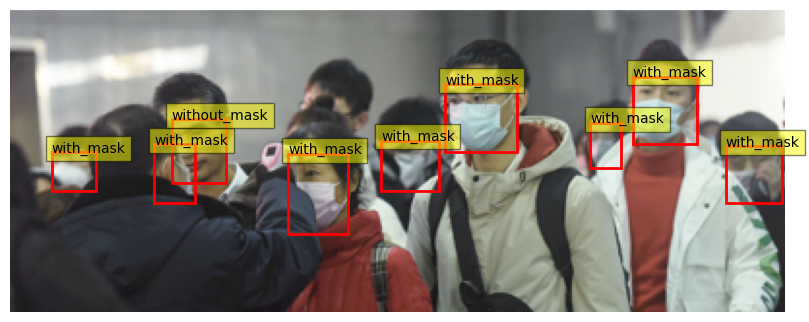

In [36]:
def plot_bounding_boxes(image_path, annotations):
    image = Image.open(image_path)
    plt.figure(figsize=(10, 10))
    plt.imshow(image)

    for _, row in annotations.iterrows():
        xmin, ymin, xmax, ymax = row['xmin'], row['ymin'], row['xmax'], row['ymax']
        plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, edgecolor='red', facecolor='none', linewidth=2))
        plt.text(xmin, ymin, row['name'], bbox=dict(facecolor='yellow', alpha=0.5))

    plt.axis('off')
    plt.show()

# Filter annotations for the image
second_image_annotations = df_annotations[df_annotations['filename'] == os.path.basename(second_image_file)]

# Plot bounding boxes on the image
plot_bounding_boxes(second_image_file, second_image_annotations)

## Conver the catagorical values

In [37]:
print(df_annotations['name'].unique())

['without_mask' 'with_mask' 'mask_weared_incorrect']


In [38]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder to the 'name' column and transform it to numerical values
df_annotations['id'] = label_encoder.fit_transform(df_annotations['name'])

Now df_annotations has a new column 'id' with numerical codes for each category

In [39]:
df_annotations.head()

,filename,width,height,xmin,xmax,ymin,ymax,name,id
0,maksssksksss0.png,512.0,366.0,79.0,109.0,105.0,142.0,without_mask,2
1,maksssksksss0.png,512.0,366.0,185.0,226.0,100.0,144.0,with_mask,1
2,maksssksksss0.png,512.0,366.0,325.0,360.0,90.0,141.0,without_mask,2
3,maksssksksss1.png,400.0,156.0,321.0,354.0,34.0,69.0,with_mask,1
4,maksssksksss1.png,400.0,156.0,224.0,261.0,38.0,73.0,with_mask,1


## Convert to yolo format(normliaze the bounding box coordinates)

converting the bounding box coordinates from absolute pixel values to normalized values

In [40]:
# Calculate the normalized x-coordinate of the center of each bounding box
df_annotations['center_x'] = (df_annotations['xmax'] + df_annotations['xmin']) / (2 * df_annotations['width'])

# Calculate the normalized y-coordinate of the center of each bounding box
df_annotations['center_y'] = (df_annotations['ymax'] + df_annotations['ymin']) / (2 * df_annotations['height'])

# Calculate the normalized width of each bounding box
df_annotations['W'] = (df_annotations['xmax'] - df_annotations['xmin']) / df_annotations['width']

# Calculate the normalized height of each bounding box
df_annotations['H'] = (df_annotations['ymax'] - df_annotations['ymin']) / df_annotations['height']

In [41]:
file_df = pd.DataFrame(df_annotations['filename'].unique(),columns=['filename'])

In [42]:
file_df.head()

,filename
0,maksssksksss0.png
1,maksssksksss1.png
2,maksssksksss10.png
3,maksssksksss100.png
4,maksssksksss101.png


## Split the data into train and test and validation sets

In [ ]:
'''# Shuffle the DataFrame
file_df = file_df.sample(frac=1).reset_index(drop=True)

# Define the split ratios
train_frac = 0.8
test_frac = 0.2

# Calculate the number of samples for each set
train_size = int(len(file_df) * train_frac)
test_size = int(len(file_df) * test_frac)

# Split the DataFrame
train_df = file_df[:train_size]
test_df = file_df[train_size:]

# Convert the 'filename' columns to tuples
train_filenames = tuple(train_df['filename'])
test_filenames = tuple(test_df['filename']) '''

In [43]:
train_df = tuple(file_df['filename'].sample(frac=0.8))
test_df = tuple(file_df.query(f"filename not in {train_df}")['filename'])

In [44]:
# Print out the sizes of each set
print(f"ALL FILES: {len(file_df)}")
print(f"Training set size: {len(train_df)}")
print(f"Testing set size: {len(test_df)}")

ALL FILES: 853
Training set size: 682
Testing set size: 171


In [45]:
# Filter the original DataFrame to get labels for training, validation, and testing sets
train_label = df_annotations.query(f"filename in {train_df}")
test_label = df_annotations.query(f"filename in {test_df}")

In [46]:
train_label

,filename,width,height,xmin,xmax,ymin,ymax,name,id,center_x,center_y,W,H
0,maksssksksss0.png,512.0,366.0,79.0,109.0,105.0,142.0,without_mask,2,0.183594,0.337432,0.058594,0.101093
1,maksssksksss0.png,512.0,366.0,185.0,226.0,100.0,144.0,with_mask,1,0.401367,0.333333,0.080078,0.120219
2,maksssksksss0.png,512.0,366.0,325.0,360.0,90.0,141.0,without_mask,2,0.668945,0.315574,0.068359,0.139344
3,maksssksksss1.png,400.0,156.0,321.0,354.0,34.0,69.0,with_mask,1,0.843750,0.330128,0.082500,0.224359
4,maksssksksss1.png,400.0,156.0,224.0,261.0,38.0,73.0,with_mask,1,0.606250,0.355769,0.092500,0.224359
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4063,maksssksksss96.png,400.0,280.0,296.0,335.0,153.0,195.0,with_mask,1,0.788750,0.621429,0.097500,0.150000
4064,maksssksksss97.png,301.0,400.0,187.0,212.0,83.0,109.0,with_mask,1,0.662791,0.240000,0.083056,0.065000
4069,maksssksksss99.png,400.0,267.0,181.0,273.0,54.0,162.0,mask_weared_incorrect,0,0.567500,0.404494,0.230000,0.404494
4070,maksssksksss99.png,400.0,267.0,99.0,176.0,87.0,165.0,with_mask,1,0.343750,0.471910,0.192500,0.292135


In [47]:
# Print the number of rows and columns in each set
print(f"Training set: {train_label.shape}")
print(f"Testing set: {test_label.shape}")

Training set: (3274, 13)
Testing set: (798, 13)


In [48]:
!mkdir -p /content/drive/MyDrive/facemask_project/demo/demo_files/dataset_files

In [49]:
!mkdir -p /content/drive/MyDrive/facemask_project/demo/demo_files//dataset_files/train/
!mkdir -p /content/drive/MyDrive/facemask_project/demo/demo_files/dataset_files/test/

In [50]:
cols = ['filename','id','center_x', 'center_y', 'W', 'H']
train_groupby = train_label[cols].groupby('filename')
test_groupby = test_label[cols].groupby('filename')

In [51]:
train_folder = '/content/drive/MyDrive/facemask_project/demo/demo_files/dataset_files/train'
test_folder = '/content/drive/MyDrive/facemask_project/demo/demo_files/dataset_files/test'

In [52]:
def save_data(filename, folder, groupby_data):
    try:
        # Ensure the destination folder exists
        os.makedirs(folder, exist_ok=True)

        # Construct the source and destination paths for the image file
        src = os.path.join('/content/drive/MyDrive/facemask_project/demo/demo_files/images', filename)
        dst = os.path.join(folder, filename)

        # Copy the image file to the destination folder
        copy(src, dst)

        # Construct the path for the corresponding text file
        text_name = os.path.join(folder, os.path.splitext(filename)[0] + '.txt')

        # Retrieve the grouped data for the filename and save it to a text file
        group_data = groupby_data.get_group(filename)
        group_data.set_index('filename', inplace=True)
        group_data.to_csv(text_name, sep=' ', header=False, index=False)

        print(f"Successfully processed {filename}")

    except Exception as e:
        print(f"Error processing {filename}: {e}")

In [53]:
train_series = pd.Series(train_groupby.groups.keys())
train_series.apply(save_data,args=(train_folder,train_groupby))

Error processing maksssksksss0.png: name 'copy' is not defined
Error processing maksssksksss1.png: name 'copy' is not defined
Error processing maksssksksss10.png: name 'copy' is not defined
Error processing maksssksksss100.png: name 'copy' is not defined
Error processing maksssksksss102.png: name 'copy' is not defined
Error processing maksssksksss104.png: name 'copy' is not defined
Error processing maksssksksss105.png: name 'copy' is not defined
Error processing maksssksksss107.png: name 'copy' is not defined
Error processing maksssksksss109.png: name 'copy' is not defined
Error processing maksssksksss11.png: name 'copy' is not defined
Error processing maksssksksss110.png: name 'copy' is not defined
Error processing maksssksksss111.png: name 'copy' is not defined
Error processing maksssksksss112.png: name 'copy' is not defined
Error processing maksssksksss113.png: name 'copy' is not defined
Error processing maksssksksss114.png: name 'copy' is not defined
Error processing maksssksksss11

,0
0,None
1,None
2,None
3,None
4,None
...,...
677,None
678,None
679,None
680,None


In [54]:
test_series = pd.Series(test_groupby.groups.keys())
test_series.apply(save_data,args=(test_folder,test_groupby))

Error processing maksssksksss101.png: name 'copy' is not defined
Error processing maksssksksss103.png: name 'copy' is not defined
Error processing maksssksksss106.png: name 'copy' is not defined
Error processing maksssksksss108.png: name 'copy' is not defined
Error processing maksssksksss117.png: name 'copy' is not defined
Error processing maksssksksss118.png: name 'copy' is not defined
Error processing maksssksksss119.png: name 'copy' is not defined
Error processing maksssksksss123.png: name 'copy' is not defined
Error processing maksssksksss135.png: name 'copy' is not defined
Error processing maksssksksss138.png: name 'copy' is not defined
Error processing maksssksksss139.png: name 'copy' is not defined
Error processing maksssksksss14.png: name 'copy' is not defined
Error processing maksssksksss145.png: name 'copy' is not defined
Error processing maksssksksss146.png: name 'copy' is not defined
Error processing maksssksksss160.png: name 'copy' is not defined
Error processing maksssksk

,0
0,None
1,None
2,None
3,None
4,None
...,...
166,None
167,None
168,None
169,None


In [55]:
print("the number of train series is",len(train_series))
print("the number of test series is",len(test_series))

the number of train series is 682
the number of test series is 171


## Create yaml file for the dataset

In [56]:
data = """
train : /content/drive/MyDrive/facemask_project/demo/demo_files/dataset_files/train
val : /content/drive/MyDrive/facemask_project/demo/demo_files/dataset_files/test
nc : 3
names : [
        'mask_weared_incorrect',
        'with_mask',
        'without_mask'
        ]
"""
with open('data.yaml', mode='w') as f:
    f.write(data)
    f.close()

# 3. Train the model

In [57]:
# This function helps manage GPU memory
import torch # import torch here
from numba import cuda
from GPUtil import showUtilization as gpu_usage

def free_gpu_cache():
    try:
        print("Initial GPU Usage")
        gpu_usage()

        torch.cuda.empty_cache()

        cuda.select_device(0)
        cuda.close()
        cuda.select_device(0)

        print("GPU Usage after emptying the cache")
        gpu_usage()
    except cuda.CudaSupportError as e:
        print("CUDA error: ", e)
        print("Ensure that the CUDA driver is installed and the NUMBA_CUDA_DRIVER environment variable is set correctly.")

free_gpu_cache()

Initial GPU Usage
| ID | GPU | MEM |
------------------
|  0 |  0% |  0% |
GPU Usage after emptying the cache
| ID | GPU | MEM |
------------------
|  0 |  7% |  1% |


In [58]:
%pip install ultralytics

from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [59]:
# Load a model
model = YOLO("yolo11n.pt")

import gc # add gc library
import torch # import torch here
gc.collect()
torch.cuda.empty_cache()


In [60]:
# Train the model
train_results = model.train(
    data="/content/drive/MyDrive/facemask_project/demo/demo_files/data.yaml",
    epochs=200,
    imgsz=640,
    batch = 15,
    cache=True,
)

Ultralytics 8.3.86 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/drive/MyDrive/facemask_project/demo/demo_files/data.yaml, epochs=200, time=None, patience=100, batch=15, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show

100%|██████████| 755k/755k [00:00<00:00, 78.8MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/facemask_project/demo/demo_files/dataset_files/train... 847 images, 0 backgrounds, 0 corrupt: 100%|██████████| 847/847 [01:03<00:00, 13.30it/s]


train: New cache created: /content/drive/MyDrive/facemask_project/demo/demo_files/dataset_files/train.cache
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.7GB RAM): 100%|██████████| 847/847 [00:18<00:00, 46.90it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/facemask_project/demo/demo_files/dataset_files/test... 408 images, 0 backgrounds, 0 corrupt: 100%|██████████| 408/408 [00:36<00:00, 11.17it/s] 


val: New cache created: /content/drive/MyDrive/facemask_project/demo/demo_files/dataset_files/test.cache
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.3GB RAM): 100%|██████████| 408/408 [00:08<00:00, 50.83it/s]


Plotting labels to runs/detect/train8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.00046875), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train8
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      2.37G      1.636      2.704      1.341         56        640: 100%|██████████| 57/57 [00:18<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.97it/s]

                   all        408       1949     0.0108      0.665       0.25      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      2.32G      1.268      1.387      1.075         43        640: 100%|██████████| 57/57 [00:15<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.96it/s]


                   all        408       1949      0.481      0.371      0.423      0.255

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      2.34G      1.185       1.17      1.043         55        640: 100%|██████████| 57/57 [00:15<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.21it/s]


                   all        408       1949      0.583      0.501      0.519      0.323

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      2.39G      1.139      1.032      1.027         82        640: 100%|██████████| 57/57 [00:15<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.38it/s]

                   all        408       1949      0.637      0.535      0.585       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200       2.2G      1.099     0.9502      1.018         42        640: 100%|██████████| 57/57 [00:15<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.19it/s]


                   all        408       1949      0.675      0.503      0.565      0.341

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      2.31G      1.095     0.8931      1.007         53        640: 100%|██████████| 57/57 [00:15<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.29it/s]


                   all        408       1949      0.667      0.545      0.582      0.375

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      2.26G      1.045     0.8252     0.9948         54        640: 100%|██████████| 57/57 [00:15<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.00it/s]


                   all        408       1949      0.582      0.581      0.608      0.392

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      2.62G      1.043     0.7883     0.9902         42        640: 100%|██████████| 57/57 [00:15<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.61it/s]

                   all        408       1949      0.662      0.517       0.58       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      2.51G      1.011     0.7283     0.9683         35        640: 100%|██████████| 57/57 [00:14<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.53it/s]

                   all        408       1949      0.793      0.621      0.707      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200       2.4G       0.99     0.6966     0.9597         49        640: 100%|██████████| 57/57 [00:14<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.39it/s]


                   all        408       1949      0.689      0.599      0.636      0.407

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      2.28G      1.001     0.6933     0.9657         58        640: 100%|██████████| 57/57 [00:14<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.59it/s]

                   all        408       1949      0.821       0.62      0.719      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      2.28G     0.9757     0.6682      0.959         62        640: 100%|██████████| 57/57 [00:15<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.52it/s]

                   all        408       1949      0.833      0.638      0.716      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      2.32G     0.9534     0.6462     0.9485         62        640: 100%|██████████| 57/57 [00:14<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.59it/s]

                   all        408       1949      0.663      0.649      0.667      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      2.37G      0.945     0.6336     0.9496         45        640: 100%|██████████| 57/57 [00:15<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.63it/s]

                   all        408       1949      0.734      0.633       0.68      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      2.43G     0.9323     0.6071     0.9406         49        640: 100%|██████████| 57/57 [00:14<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.41it/s]

                   all        408       1949      0.778      0.659      0.735      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      2.56G     0.9333     0.6086     0.9426         69        640: 100%|██████████| 57/57 [00:14<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.94it/s]


                   all        408       1949      0.774      0.692      0.745       0.49

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      2.34G      0.895     0.5881     0.9408         61        640: 100%|██████████| 57/57 [00:15<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.94it/s]

                   all        408       1949      0.779      0.662      0.737      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      2.58G     0.8924     0.5642     0.9368         48        640: 100%|██████████| 57/57 [00:14<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.66it/s]

                   all        408       1949      0.748      0.728      0.739      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      2.45G      0.903     0.5735     0.9291         69        640: 100%|██████████| 57/57 [00:14<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.18it/s]

                   all        408       1949      0.801      0.645      0.728      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      2.45G     0.8853     0.5655      0.926         62        640: 100%|██████████| 57/57 [00:14<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.07it/s]

                   all        408       1949      0.792      0.632      0.721      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      2.45G     0.8447     0.5353     0.9177         37        640: 100%|██████████| 57/57 [00:14<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.70it/s]

                   all        408       1949       0.71      0.732      0.735      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      2.55G     0.8385     0.5365     0.9223         71        640: 100%|██████████| 57/57 [00:14<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.62it/s]

                   all        408       1949      0.735      0.683      0.745      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      2.46G      0.827     0.5254     0.9137         48        640: 100%|██████████| 57/57 [00:15<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.01it/s]

                   all        408       1949      0.828      0.671      0.739      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      2.52G     0.8539     0.5441     0.9184         50        640: 100%|██████████| 57/57 [00:14<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.50it/s]

                   all        408       1949      0.782      0.715      0.756      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200       2.3G     0.8493     0.5366     0.9235         37        640: 100%|██████████| 57/57 [00:14<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.50it/s]

                   all        408       1949      0.811      0.699      0.767      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      2.43G     0.8282     0.5222     0.9132         47        640: 100%|██████████| 57/57 [00:14<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.01it/s]


                   all        408       1949      0.842      0.699      0.769      0.522

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      2.49G     0.8258     0.5173     0.9155         50        640: 100%|██████████| 57/57 [00:14<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.53it/s]

                   all        408       1949      0.871      0.695      0.788      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      2.28G     0.8273     0.5063     0.9119         56        640: 100%|██████████| 57/57 [00:14<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.63it/s]

                   all        408       1949      0.855      0.745       0.81      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      2.36G     0.7949     0.4961     0.9045         52        640: 100%|██████████| 57/57 [00:14<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.55it/s]


                   all        408       1949      0.806      0.713       0.77      0.537

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      2.64G      0.776     0.4803     0.8991         32        640: 100%|██████████| 57/57 [00:15<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.41it/s]

                   all        408       1949      0.822      0.724      0.789       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200       2.3G     0.7863      0.484     0.9021         69        640: 100%|██████████| 57/57 [00:14<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.53it/s]

                   all        408       1949      0.737      0.754      0.782      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      2.26G     0.8188     0.5073     0.9159         73        640: 100%|██████████| 57/57 [00:14<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.25it/s]

                   all        408       1949      0.906      0.737      0.825      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      2.36G     0.7905     0.4897     0.9037         59        640: 100%|██████████| 57/57 [00:14<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.30it/s]

                   all        408       1949      0.802      0.742       0.81      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      2.37G     0.7734     0.4761     0.8988         49        640: 100%|██████████| 57/57 [00:14<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.56it/s]

                   all        408       1949      0.893      0.762      0.834      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      2.39G     0.7869     0.4872     0.9015         71        640: 100%|██████████| 57/57 [00:14<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.40it/s]

                   all        408       1949      0.821      0.768      0.807      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200       2.8G     0.7616     0.4655      0.898         37        640: 100%|██████████| 57/57 [00:14<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.73it/s]

                   all        408       1949       0.88      0.746      0.823      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200       2.6G     0.7795     0.4875     0.9033         48        640: 100%|██████████| 57/57 [00:14<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.55it/s]

                   all        408       1949      0.873       0.71      0.792       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      2.46G     0.7479     0.4614     0.8959        145        640: 100%|██████████| 57/57 [00:14<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.47it/s]

                   all        408       1949      0.839      0.727      0.807      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      2.28G     0.7752     0.4687     0.8935         56        640: 100%|██████████| 57/57 [00:14<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.60it/s]

                   all        408       1949      0.818       0.73      0.793      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      2.27G     0.7356     0.4514     0.8923         40        640: 100%|██████████| 57/57 [00:14<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.48it/s]

                   all        408       1949      0.876      0.695      0.811      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      2.34G     0.7387     0.4497     0.8873         56        640: 100%|██████████| 57/57 [00:14<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.54it/s]

                   all        408       1949      0.854      0.749      0.819      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      2.22G     0.7284     0.4477     0.8866         58        640: 100%|██████████| 57/57 [00:15<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.21it/s]

                   all        408       1949      0.891      0.758       0.83      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      2.62G     0.7368     0.4554     0.8883         34        640: 100%|██████████| 57/57 [00:14<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.53it/s]

                   all        408       1949      0.845      0.811      0.854       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      2.42G     0.7307     0.4489     0.8857         55        640: 100%|██████████| 57/57 [00:15<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.46it/s]

                   all        408       1949      0.921      0.717      0.835      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      2.28G     0.7448     0.4618     0.8873         55        640: 100%|██████████| 57/57 [00:14<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.73it/s]

                   all        408       1949      0.843      0.792      0.843      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      2.18G     0.7196     0.4426     0.8872         61        640: 100%|██████████| 57/57 [00:15<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.38it/s]

                   all        408       1949      0.887      0.757      0.845      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      2.59G      0.721      0.437      0.882         63        640: 100%|██████████| 57/57 [00:14<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.55it/s]

                   all        408       1949      0.893       0.74      0.837       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      2.22G     0.6894     0.4247     0.8813         55        640: 100%|██████████| 57/57 [00:14<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.50it/s]

                   all        408       1949      0.913      0.746      0.824      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      2.66G     0.7136     0.4321     0.8856         72        640: 100%|██████████| 57/57 [00:14<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.00it/s]

                   all        408       1949      0.887      0.757      0.848        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      2.46G      0.712     0.4371     0.8821        122        640: 100%|██████████| 57/57 [00:14<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.64it/s]

                   all        408       1949      0.898      0.701      0.815      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      2.09G     0.6852     0.4181     0.8823         46        640: 100%|██████████| 57/57 [00:14<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.57it/s]

                   all        408       1949      0.852      0.728       0.82      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      2.41G     0.7059     0.4271     0.8771         30        640: 100%|██████████| 57/57 [00:14<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.19it/s]

                   all        408       1949       0.88      0.745      0.832      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      2.36G     0.6935      0.422     0.8805         46        640: 100%|██████████| 57/57 [00:14<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.60it/s]

                   all        408       1949      0.796      0.783      0.831      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      2.32G     0.6908     0.4246     0.8744         70        640: 100%|██████████| 57/57 [00:14<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.73it/s]

                   all        408       1949      0.872      0.724      0.826      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      2.71G     0.6822     0.4168      0.885         67        640: 100%|██████████| 57/57 [00:14<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.14it/s]

                   all        408       1949      0.895        0.8       0.85      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      2.51G     0.6852     0.4219      0.876         31        640: 100%|██████████| 57/57 [00:15<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.64it/s]

                   all        408       1949      0.872      0.746      0.839      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      2.36G     0.6739     0.4091      0.872         27        640: 100%|██████████| 57/57 [00:15<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.43it/s]

                   all        408       1949      0.852      0.768      0.849      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      2.33G     0.6705     0.4127     0.8718         82        640: 100%|██████████| 57/57 [00:15<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.73it/s]

                   all        408       1949      0.836      0.796       0.85      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      2.29G     0.6492       0.41     0.8699         29        640: 100%|██████████| 57/57 [00:15<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.06it/s]

                   all        408       1949      0.878      0.745      0.819      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      2.46G     0.6716     0.4107     0.8719         83        640: 100%|██████████| 57/57 [00:15<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.57it/s]

                   all        408       1949      0.867      0.738      0.823      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      2.23G     0.6538      0.402     0.8673         63        640: 100%|██████████| 57/57 [00:14<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.80it/s]

                   all        408       1949      0.872      0.775      0.856      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      2.57G     0.6435     0.3956     0.8634         52        640: 100%|██████████| 57/57 [00:14<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.65it/s]

                   all        408       1949      0.832      0.729      0.813      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      2.55G     0.6581     0.4094     0.8751         51        640: 100%|██████████| 57/57 [00:14<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.63it/s]

                   all        408       1949      0.856      0.822       0.88      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      2.34G     0.6576     0.4029     0.8712         86        640: 100%|██████████| 57/57 [00:14<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.53it/s]

                   all        408       1949      0.853      0.849       0.87      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      2.21G     0.6491     0.3946     0.8691         64        640: 100%|██████████| 57/57 [00:14<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.46it/s]

                   all        408       1949      0.908      0.791      0.871      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      2.33G     0.6176     0.3851      0.863         64        640: 100%|██████████| 57/57 [00:14<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.69it/s]

                   all        408       1949      0.862      0.809      0.868       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      2.31G     0.6484     0.4023     0.8618         72        640: 100%|██████████| 57/57 [00:14<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.92it/s]

                   all        408       1949      0.891      0.771      0.867      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      2.25G     0.6461     0.3934     0.8721         82        640: 100%|██████████| 57/57 [00:15<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.99it/s]

                   all        408       1949      0.905      0.813      0.878      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      2.23G     0.6287     0.3869     0.8615         66        640: 100%|██████████| 57/57 [00:15<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.58it/s]

                   all        408       1949      0.927      0.797      0.882       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      2.43G     0.6237     0.3821     0.8641         80        640: 100%|██████████| 57/57 [00:14<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.92it/s]

                   all        408       1949      0.877      0.815      0.886      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      2.39G     0.6344     0.3875     0.8649         77        640: 100%|██████████| 57/57 [00:16<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.40it/s]

                   all        408       1949      0.846       0.78      0.856      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      2.21G     0.6282     0.3823     0.8665         27        640: 100%|██████████| 57/57 [00:14<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.61it/s]

                   all        408       1949      0.901        0.8      0.877      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      2.19G     0.6127     0.3774     0.8609         51        640: 100%|██████████| 57/57 [00:14<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.00it/s]

                   all        408       1949      0.864      0.805      0.863      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      2.31G     0.6277     0.3863     0.8616         52        640: 100%|██████████| 57/57 [00:15<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.34it/s]

                   all        408       1949      0.887      0.775      0.855      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      2.31G     0.6269     0.3834     0.8657         31        640: 100%|██████████| 57/57 [00:14<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.65it/s]

                   all        408       1949      0.897      0.765       0.85      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      2.29G     0.6274     0.3861     0.8618         47        640: 100%|██████████| 57/57 [00:14<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.18it/s]


                   all        408       1949       0.87      0.797       0.87       0.63

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      2.48G     0.6139     0.3846     0.8638         93        640: 100%|██████████| 57/57 [00:15<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.58it/s]

                   all        408       1949      0.894      0.777      0.861      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      2.56G      0.621     0.3798     0.8648         29        640: 100%|██████████| 57/57 [00:14<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.45it/s]

                   all        408       1949      0.864      0.809      0.876      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      2.36G     0.6212     0.3784     0.8604         43        640: 100%|██████████| 57/57 [00:15<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.98it/s]


                   all        408       1949        0.9      0.828      0.889      0.656

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      2.17G     0.6036     0.3699     0.8521         40        640: 100%|██████████| 57/57 [00:15<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.67it/s]

                   all        408       1949      0.891      0.821       0.88       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      2.57G      0.607     0.3718     0.8593         52        640: 100%|██████████| 57/57 [00:14<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.57it/s]

                   all        408       1949      0.902      0.804      0.885      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      2.37G     0.6182     0.3804     0.8601         57        640: 100%|██████████| 57/57 [00:15<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.21it/s]

                   all        408       1949      0.911      0.794      0.859      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      2.38G     0.6063     0.3736      0.857         45        640: 100%|██████████| 57/57 [00:15<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.90it/s]

                   all        408       1949       0.91      0.793      0.869      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      2.39G     0.6032     0.3739     0.8598         36        640: 100%|██████████| 57/57 [00:14<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.39it/s]

                   all        408       1949      0.875      0.851      0.895      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      2.48G     0.6086     0.3764     0.8605         52        640: 100%|██████████| 57/57 [00:15<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.32it/s]

                   all        408       1949      0.888      0.805      0.862      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      2.21G     0.5943     0.3603     0.8556         69        640: 100%|██████████| 57/57 [00:15<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.96it/s]

                   all        408       1949      0.894      0.801      0.878      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      2.63G     0.5972      0.365     0.8501         86        640: 100%|██████████| 57/57 [00:15<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.54it/s]

                   all        408       1949      0.831      0.853      0.868      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      2.52G     0.5958      0.361     0.8556         42        640: 100%|██████████| 57/57 [00:14<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.19it/s]

                   all        408       1949      0.915      0.784      0.884      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      2.44G     0.5881     0.3592     0.8532         37        640: 100%|██████████| 57/57 [00:16<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.80it/s]

                   all        408       1949      0.932      0.804      0.897       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      2.55G     0.5766     0.3554     0.8525         42        640: 100%|██████████| 57/57 [00:15<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.27it/s]

                   all        408       1949      0.888      0.811      0.891      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      2.61G     0.5832     0.3611     0.8528         45        640: 100%|██████████| 57/57 [00:15<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.50it/s]


                   all        408       1949      0.883      0.859      0.902      0.667

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      3.04G     0.5991     0.3661     0.8548         43        640: 100%|██████████| 57/57 [00:15<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.24it/s]

                   all        408       1949      0.916      0.831      0.893      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      2.19G     0.5801     0.3509     0.8514         58        640: 100%|██████████| 57/57 [00:14<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.31it/s]

                   all        408       1949      0.919      0.829        0.9      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      2.32G     0.5849     0.3559     0.8491         22        640: 100%|██████████| 57/57 [00:15<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.10it/s]

                   all        408       1949      0.895      0.829      0.895      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      2.59G     0.5663     0.3496     0.8531         19        640: 100%|██████████| 57/57 [00:15<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.42it/s]

                   all        408       1949      0.936      0.819      0.901      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      2.31G     0.5557     0.3414     0.8471         54        640: 100%|██████████| 57/57 [00:15<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.44it/s]

                   all        408       1949      0.905      0.839      0.899      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      2.59G     0.5764     0.3534      0.852         90        640: 100%|██████████| 57/57 [00:15<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.65it/s]

                   all        408       1949      0.872      0.849      0.892       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200       2.4G     0.5776     0.3513      0.852         46        640: 100%|██████████| 57/57 [00:15<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.55it/s]

                   all        408       1949      0.913      0.837      0.894      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      2.29G     0.5538     0.3377     0.8469         71        640: 100%|██████████| 57/57 [00:15<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.42it/s]

                   all        408       1949      0.897      0.846      0.903      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      2.46G      0.562     0.3422     0.8542         46        640: 100%|██████████| 57/57 [00:16<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.40it/s]

                   all        408       1949      0.877      0.864      0.901      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      2.22G     0.5598     0.3405     0.8435         53        640: 100%|██████████| 57/57 [00:15<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.41it/s]

                   all        408       1949        0.9      0.838      0.898      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      2.29G      0.561     0.3486     0.8445         31        640: 100%|██████████| 57/57 [00:15<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.82it/s]

                   all        408       1949      0.891      0.865      0.909      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      2.16G     0.5467     0.3375     0.8463         38        640: 100%|██████████| 57/57 [00:15<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.86it/s]

                   all        408       1949      0.909      0.846      0.912      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      2.45G     0.5688     0.3472     0.8505         69        640: 100%|██████████| 57/57 [00:15<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.43it/s]

                   all        408       1949      0.943      0.823      0.915      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      2.33G     0.5459     0.3319     0.8457         39        640: 100%|██████████| 57/57 [00:15<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.39it/s]

                   all        408       1949      0.898      0.843      0.913      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      2.39G     0.5554     0.3404     0.8481         89        640: 100%|██████████| 57/57 [00:15<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.33it/s]

                   all        408       1949      0.913      0.832      0.907      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      2.29G     0.5635     0.3398     0.8465         55        640: 100%|██████████| 57/57 [00:15<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.35it/s]

                   all        408       1949      0.864      0.856      0.902      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      2.36G     0.5409     0.3246     0.8384         47        640: 100%|██████████| 57/57 [00:15<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.58it/s]

                   all        408       1949      0.891      0.857      0.913      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      2.28G     0.5339     0.3302     0.8479         41        640: 100%|██████████| 57/57 [00:15<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.21it/s]

                   all        408       1949      0.921      0.852      0.903       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200       2.7G     0.5293     0.3247     0.8405         38        640: 100%|██████████| 57/57 [00:15<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.37it/s]

                   all        408       1949      0.923      0.823      0.911      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      2.28G     0.5434     0.3328     0.8481         54        640: 100%|██████████| 57/57 [00:15<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.84it/s]

                   all        408       1949      0.896      0.826      0.892      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      2.33G     0.5578     0.3402     0.8484         42        640: 100%|██████████| 57/57 [00:15<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.17it/s]

                   all        408       1949      0.887      0.863      0.909      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      2.45G     0.5176     0.3211     0.8382         44        640: 100%|██████████| 57/57 [00:15<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.58it/s]

                   all        408       1949       0.91      0.845      0.915       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      2.39G     0.5459     0.3358     0.8473         43        640: 100%|██████████| 57/57 [00:16<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.56it/s]

                   all        408       1949      0.905      0.837      0.903      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      2.26G     0.5415     0.3261     0.8405         88        640: 100%|██████████| 57/57 [00:15<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.50it/s]

                   all        408       1949      0.916      0.843       0.91      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      2.64G     0.5248     0.3237     0.8381         76        640: 100%|██████████| 57/57 [00:15<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.98it/s]


                   all        408       1949      0.909      0.854      0.902      0.681

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      2.37G     0.5355     0.3246     0.8401         56        640: 100%|██████████| 57/57 [00:15<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.82it/s]

                   all        408       1949      0.934      0.834      0.913      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      2.46G     0.5328     0.3226     0.8422         40        640: 100%|██████████| 57/57 [00:15<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.60it/s]

                   all        408       1949      0.938      0.836      0.916      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      2.18G     0.5394     0.3327     0.8455         58        640: 100%|██████████| 57/57 [00:14<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.26it/s]


                   all        408       1949      0.898      0.879      0.914      0.683

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      2.25G     0.5146     0.3176     0.8397         79        640: 100%|██████████| 57/57 [00:15<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.83it/s]

                   all        408       1949      0.911      0.863      0.919      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200       2.4G     0.5241      0.318      0.841         58        640: 100%|██████████| 57/57 [00:14<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.50it/s]

                   all        408       1949      0.901      0.863      0.913      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200       2.6G     0.5362     0.3227     0.8446         50        640: 100%|██████████| 57/57 [00:15<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.47it/s]

                   all        408       1949      0.914      0.858      0.918      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      2.14G     0.5181     0.3157     0.8381         37        640: 100%|██████████| 57/57 [00:15<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.72it/s]

                   all        408       1949      0.891      0.867      0.914      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      2.48G      0.528     0.3232     0.8423         82        640: 100%|██████████| 57/57 [00:15<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.47it/s]

                   all        408       1949      0.887       0.84      0.902      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      2.38G     0.5337     0.3205     0.8434         34        640: 100%|██████████| 57/57 [00:15<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.54it/s]

                   all        408       1949      0.893      0.842      0.903      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      2.16G     0.5097     0.3128     0.8384         40        640: 100%|██████████| 57/57 [00:15<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.44it/s]

                   all        408       1949      0.925      0.811      0.914      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      2.66G     0.5224      0.322     0.8372         65        640: 100%|██████████| 57/57 [00:14<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.60it/s]

                   all        408       1949      0.931      0.832       0.91      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      2.42G     0.5228     0.3176     0.8393         70        640: 100%|██████████| 57/57 [00:14<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.37it/s]

                   all        408       1949      0.904      0.844      0.907      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200       2.3G     0.5138      0.316     0.8378         58        640: 100%|██████████| 57/57 [00:15<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.78it/s]

                   all        408       1949      0.913      0.834      0.912      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      2.29G     0.5207     0.3139      0.841         72        640: 100%|██████████| 57/57 [00:14<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.28it/s]

                   all        408       1949      0.897      0.845      0.921      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      2.41G     0.5347     0.3222     0.8446         56        640: 100%|██████████| 57/57 [00:15<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.51it/s]

                   all        408       1949      0.919      0.851      0.926      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      2.34G      0.505     0.3093     0.8374         18        640: 100%|██████████| 57/57 [00:14<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.63it/s]

                   all        408       1949      0.914       0.87      0.928      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      2.48G     0.5025     0.3062     0.8425         58        640: 100%|██████████| 57/57 [00:14<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.46it/s]

                   all        408       1949      0.921       0.85       0.92      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      2.31G      0.492     0.3029     0.8306         41        640: 100%|██████████| 57/57 [00:14<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.45it/s]

                   all        408       1949      0.905      0.855      0.913        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      2.18G     0.5023      0.311     0.8323         59        640: 100%|██████████| 57/57 [00:14<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.16it/s]

                   all        408       1949      0.894      0.865      0.915        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      2.34G     0.4997     0.3084     0.8295        103        640: 100%|██████████| 57/57 [00:14<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.47it/s]

                   all        408       1949      0.887      0.869      0.912      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      2.56G     0.5119      0.313     0.8356         35        640: 100%|██████████| 57/57 [00:15<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.61it/s]

                   all        408       1949      0.906      0.843      0.911      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      2.39G     0.4976     0.3042     0.8366         56        640: 100%|██████████| 57/57 [00:14<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.57it/s]


                   all        408       1949      0.917       0.84      0.918      0.698

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      2.33G     0.4967     0.3067     0.8314         64        640: 100%|██████████| 57/57 [00:14<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.50it/s]

                   all        408       1949      0.941      0.834      0.924      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      2.37G     0.4951     0.3052     0.8351         34        640: 100%|██████████| 57/57 [00:14<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.37it/s]

                   all        408       1949      0.896      0.852      0.918      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      2.41G     0.4983     0.3022     0.8315         47        640: 100%|██████████| 57/57 [00:14<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.37it/s]

                   all        408       1949      0.946      0.845      0.924      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      2.34G     0.4856      0.298     0.8304         34        640: 100%|██████████| 57/57 [00:15<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.57it/s]

                   all        408       1949      0.953      0.855      0.926      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      2.29G     0.4747     0.2928     0.8268         65        640: 100%|██████████| 57/57 [00:14<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.52it/s]

                   all        408       1949      0.912      0.873      0.926      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      2.27G     0.4818     0.2938      0.831         26        640: 100%|██████████| 57/57 [00:14<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.60it/s]

                   all        408       1949       0.95      0.851      0.926      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      2.17G     0.4771      0.293     0.8303         61        640: 100%|██████████| 57/57 [00:15<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.04it/s]

                   all        408       1949      0.916      0.869      0.927      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      2.36G      0.488     0.2941     0.8329         57        640: 100%|██████████| 57/57 [00:14<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.66it/s]

                   all        408       1949      0.888      0.881       0.93      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      2.43G     0.4833     0.2916     0.8364         23        640: 100%|██████████| 57/57 [00:14<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.42it/s]

                   all        408       1949      0.927      0.859      0.927      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      2.36G      0.485     0.2943      0.828         44        640: 100%|██████████| 57/57 [00:15<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.96it/s]

                   all        408       1949      0.927      0.853      0.919      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      2.32G     0.4722      0.291     0.8332         53        640: 100%|██████████| 57/57 [00:14<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.61it/s]

                   all        408       1949      0.933      0.855      0.925      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      2.25G     0.4756     0.2878     0.8273         71        640: 100%|██████████| 57/57 [00:14<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.52it/s]

                   all        408       1949      0.935      0.875       0.93       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200       2.2G     0.4636     0.2921     0.8333         81        640: 100%|██████████| 57/57 [00:14<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.72it/s]

                   all        408       1949       0.94      0.861      0.922      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200      2.16G     0.4726     0.2889     0.8324         45        640: 100%|██████████| 57/57 [00:14<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.60it/s]

                   all        408       1949      0.954      0.854      0.925      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200      2.19G     0.4557     0.2824     0.8261         43        640: 100%|██████████| 57/57 [00:14<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.46it/s]

                   all        408       1949       0.93      0.876      0.927      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200      2.57G     0.4761     0.2937     0.8294         68        640: 100%|██████████| 57/57 [00:15<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.98it/s]

                   all        408       1949      0.939       0.87      0.929      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200      2.23G     0.4716     0.2851     0.8309         37        640: 100%|██████████| 57/57 [00:14<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.49it/s]

                   all        408       1949      0.927      0.869      0.929      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      2.37G     0.4727     0.2922      0.833         41        640: 100%|██████████| 57/57 [00:14<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.43it/s]

                   all        408       1949      0.932      0.858      0.926      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      2.42G     0.4779     0.2918     0.8334         35        640: 100%|██████████| 57/57 [00:14<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.59it/s]

                   all        408       1949      0.939      0.865      0.929      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      2.26G     0.4772     0.2926     0.8282         55        640: 100%|██████████| 57/57 [00:15<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.46it/s]

                   all        408       1949      0.934       0.87      0.926      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      2.59G     0.4652     0.2828     0.8318         29        640: 100%|██████████| 57/57 [00:14<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.54it/s]

                   all        408       1949      0.942      0.873      0.928      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      2.29G     0.4621     0.2808      0.831         40        640: 100%|██████████| 57/57 [00:14<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.06it/s]

                   all        408       1949       0.94      0.876      0.931      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200      2.29G     0.4682     0.2864     0.8283         79        640: 100%|██████████| 57/57 [00:15<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.67it/s]

                   all        408       1949      0.938      0.882      0.938      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      2.39G     0.4579     0.2818     0.8273         52        640: 100%|██████████| 57/57 [00:14<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.44it/s]

                   all        408       1949      0.951      0.877      0.932      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      2.28G     0.4511     0.2815     0.8257         46        640: 100%|██████████| 57/57 [00:14<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.44it/s]

                   all        408       1949       0.95      0.879      0.933      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200       2.3G     0.4621     0.2797     0.8251         82        640: 100%|██████████| 57/57 [00:15<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.53it/s]

                   all        408       1949      0.963      0.877      0.929      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200      2.34G     0.4447     0.2764     0.8229         57        640: 100%|██████████| 57/57 [00:15<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.51it/s]

                   all        408       1949      0.963      0.868      0.932      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      2.33G     0.4583     0.2787     0.8279         37        640: 100%|██████████| 57/57 [00:15<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.43it/s]


                   all        408       1949      0.969      0.876       0.94      0.727

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      2.63G     0.4607     0.2802     0.8318         41        640: 100%|██████████| 57/57 [00:15<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.46it/s]

                   all        408       1949      0.964      0.873      0.936      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      2.32G     0.4562     0.2791     0.8283         45        640: 100%|██████████| 57/57 [00:14<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.49it/s]

                   all        408       1949      0.964      0.878      0.936      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200      2.57G     0.4573     0.2802      0.827         44        640: 100%|██████████| 57/57 [00:14<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.42it/s]

                   all        408       1949      0.965      0.879       0.94      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      2.35G     0.4294     0.2673     0.8233         42        640: 100%|██████████| 57/57 [00:15<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.90it/s]

                   all        408       1949      0.964      0.879      0.939      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200      2.58G     0.4547     0.2767     0.8238         65        640: 100%|██████████| 57/57 [00:14<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.52it/s]

                   all        408       1949      0.955      0.886      0.944      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200      2.18G     0.4465     0.2715     0.8288         33        640: 100%|██████████| 57/57 [00:15<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.68it/s]

                   all        408       1949      0.967      0.874      0.941       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200      2.31G     0.4468     0.2765     0.8292         40        640: 100%|██████████| 57/57 [00:14<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.80it/s]

                   all        408       1949      0.961      0.887      0.934      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200      2.28G     0.4361     0.2711     0.8231         51        640: 100%|██████████| 57/57 [00:15<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.57it/s]

                   all        408       1949      0.956      0.889      0.942      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200       2.3G     0.4256     0.2686     0.8222         55        640: 100%|██████████| 57/57 [00:14<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.60it/s]

                   all        408       1949       0.95       0.89      0.943      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200      2.24G     0.4334     0.2678     0.8247         73        640: 100%|██████████| 57/57 [00:14<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.97it/s]

                   all        408       1949      0.943      0.886      0.938       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200      2.65G     0.4441     0.2716      0.824         49        640: 100%|██████████| 57/57 [00:15<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.42it/s]

                   all        408       1949       0.94      0.893      0.941      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200      2.33G     0.4365     0.2669     0.8222         55        640: 100%|██████████| 57/57 [00:15<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.17it/s]

                   all        408       1949      0.959      0.882      0.945      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      2.21G     0.4369     0.2665     0.8244         44        640: 100%|██████████| 57/57 [00:16<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.98it/s]

                   all        408       1949      0.945      0.885      0.938      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      2.36G     0.4333     0.2632     0.8181         31        640: 100%|██████████| 57/57 [00:15<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.53it/s]

                   all        408       1949       0.94      0.895      0.941      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200       2.4G     0.4338     0.2657     0.8216         35        640: 100%|██████████| 57/57 [00:14<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.55it/s]

                   all        408       1949       0.94      0.895      0.943      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200       2.5G     0.4218     0.2589     0.8215         83        640: 100%|██████████| 57/57 [00:14<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.82it/s]

                   all        408       1949       0.95      0.887      0.943      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      2.51G     0.4223     0.2606     0.8224         23        640: 100%|██████████| 57/57 [00:15<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.46it/s]

                   all        408       1949      0.952      0.888      0.946      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200       2.7G     0.4275     0.2642     0.8212         34        640: 100%|██████████| 57/57 [00:15<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.32it/s]

                   all        408       1949      0.957      0.888      0.946      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200      2.31G     0.4186     0.2623     0.8199         29        640: 100%|██████████| 57/57 [00:15<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.87it/s]

                   all        408       1949      0.966      0.892      0.944      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200      2.18G     0.4293     0.2612     0.8199         58        640: 100%|██████████| 57/57 [00:15<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.53it/s]

                   all        408       1949       0.96      0.892      0.942      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      2.34G     0.4229     0.2582     0.8204         51        640: 100%|██████████| 57/57 [00:15<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.51it/s]

                   all        408       1949      0.951      0.898      0.942      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200      2.73G     0.4241     0.2646     0.8214         41        640: 100%|██████████| 57/57 [00:15<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.76it/s]

                   all        408       1949      0.952      0.894      0.943      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200      2.24G     0.4274     0.2606     0.8217         38        640: 100%|██████████| 57/57 [00:15<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.60it/s]

                   all        408       1949      0.957      0.886      0.943      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200      2.21G     0.4262     0.2594     0.8199         53        640: 100%|██████████| 57/57 [00:15<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.57it/s]

                   all        408       1949      0.976      0.879      0.945      0.737


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200      2.71G     0.8413     0.3988     0.9133         15        640: 100%|██████████| 57/57 [00:16<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.09it/s]

                   all        408       1949      0.941      0.872      0.937      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200      2.68G     0.8267     0.3908     0.9123         72        640: 100%|██████████| 57/57 [00:14<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.40it/s]

                   all        408       1949      0.952       0.88      0.937      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200      2.63G     0.8122     0.3789      0.903         14        640: 100%|██████████| 57/57 [00:14<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.48it/s]

                   all        408       1949      0.938      0.888      0.941      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200      2.81G       0.81     0.3733     0.8956         28        640: 100%|██████████| 57/57 [00:14<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.63it/s]


                   all        408       1949       0.97       0.88      0.945      0.737

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200      2.38G     0.8112      0.379      0.898        129        640: 100%|██████████| 57/57 [00:14<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.57it/s]

                   all        408       1949      0.963      0.882      0.947      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200      2.62G     0.8097     0.3698     0.8923         23        640: 100%|██████████| 57/57 [00:14<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.61it/s]

                   all        408       1949      0.942      0.891      0.949      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200      2.62G      0.801      0.371     0.8985         35        640: 100%|██████████| 57/57 [00:14<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.51it/s]

                   all        408       1949      0.946      0.893      0.949      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200      2.47G     0.7812     0.3639     0.8881          9        640: 100%|██████████| 57/57 [00:14<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.75it/s]

                   all        408       1949      0.945      0.889      0.949      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200       2.6G     0.7965      0.366     0.8934         17        640: 100%|██████████| 57/57 [00:14<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.41it/s]

                   all        408       1949      0.945       0.89       0.95      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200      2.39G     0.7974     0.3671      0.887         44        640: 100%|██████████| 57/57 [00:14<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.61it/s]

                   all        408       1949      0.967      0.881      0.951      0.744



200 epochs completed in 1.045 hours.
Optimizer stripped from runs/detect/train8/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train8/weights/best.pt, 5.5MB

Validating runs/detect/train8/weights/best.pt...
Ultralytics 8.3.86 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.12it/s]


                   all        408       1949      0.945       0.89       0.95      0.747
 mask_weared_incorrect         42         48      0.925      0.875      0.944      0.766
             with_mask        372       1559      0.983      0.947      0.984      0.794
          without_mask        138        342      0.928      0.848      0.923       0.68
Speed: 0.3ms preprocess, 2.5ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/train8


## Store the model

In [61]:
store = model.export(format="onnx")

Ultralytics 8.3.86 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.00GHz)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs

PyTorch: starting from 'runs/detect/train8/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (5.2 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 98.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.9/142.9 kB 280.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.8/280.8 MB 142.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 142.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 226.0 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 14.0s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu']
requirements: ⚠️ Restart runtime or rerun command for upd

 ## for inference

In [62]:
store = model.export(format="openvino")

Ultralytics 8.3.86 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.00GHz)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs

PyTorch: starting from 'runs/detect/train8/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (5.2 MB)
requirements: Ultralytics requirement ['openvino>=2024.0.0,<2025.0.0'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 MB 140.7 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 8.6s, installed 1 package: ['openvino>=2024.0.0,<2025.0.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


OpenVINO: starting export with openvino 2024.6.0-17404-4c0f47d2335-releases/2024/6...
OpenVINO: export success ✅ 27.0s, saved as 'runs/detect/train8/weights/best_openvino_model/' (10.2 MB)

Export complete (28.0s)
Results saved to /content/drive/MyDrive/facemask_project/demo/demo_files/runs/detect/train8/weights
Predict:         yol

Converts the model
It transforms the trained model into OpenVINO IR (Intermediate Representation), which consists of:
model.xml (network structure)
model.bin (weights and biases)

Ultralytics 8.3.86 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/drive/MyDrive/facemask_project/demo/demo_files/dataset_files/test.cache... 408 images, 0 backgrounds, 0 corrupt: 100%|██████████| 408/408 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.3GB RAM): 100%|██████████| 408/408 [00:15<00:00, 26.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.99it/s]


                   all        408       1949       0.94      0.892      0.951      0.746
 mask_weared_incorrect         42         48       0.92      0.875      0.948      0.762
             with_mask        372       1559      0.983      0.948      0.984      0.796
          without_mask        138        342      0.918      0.853      0.922       0.68
Speed: 1.0ms preprocess, 6.4ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train82

image 1/1 /content/drive/MyDrive/facemask_project/demo/demo_files/images/maksssksksss515.png: 640x512 1 with_mask, 45.0ms
Speed: 2.9ms preprocess, 45.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)


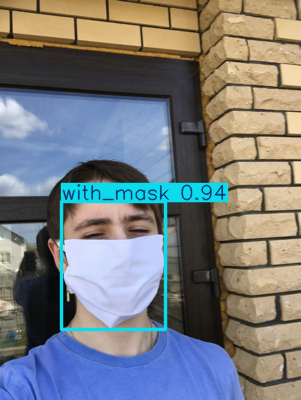

In [63]:
metrics = model.val()

# Perform object detection on an image
results = model("/content/drive/MyDrive/facemask_project/demo/demo_files/images/maksssksksss515.png")
results[0].show()

 # Evaluate

In [64]:
metrics = model.val(split='val')

print(f"Mean Average Precision  : {metrics.box.map}")
print(f"Mean Average Precision   : {metrics.box.map50}")
print(f"Mean Average Precision    : {metrics.box.map75}")
print("recall : ",metrics.box.r)
print(metrics.box.f1)
print(metrics.box.maps)

metrics_df = pd.DataFrame.from_dict(metrics.results_dict, orient='index', columns=['Metric Value'])

metrics_df.round(3)

Ultralytics 8.3.86 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /content/drive/MyDrive/facemask_project/demo/demo_files/dataset_files/test.cache... 408 images, 0 backgrounds, 0 corrupt: 100%|██████████| 408/408 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.3GB RAM): 100%|██████████| 408/408 [00:08<00:00, 46.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  5.82it/s]


                   all        408       1949       0.94      0.892      0.951      0.746
 mask_weared_incorrect         42         48       0.92      0.875      0.948      0.762
             with_mask        372       1559      0.983      0.948      0.984      0.796
          without_mask        138        342      0.918      0.853      0.922       0.68
Speed: 0.5ms preprocess, 3.3ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train83
Mean Average Precision  : 0.7461584217773409
Mean Average Precision   : 0.9513093674537308
Mean Average Precision    : 0.842452780629313
recall :  [      0.875     0.94768     0.85269]
[    0.89717     0.96487      0.8842]
[    0.76229     0.79606     0.68012]


,Metric Value
metrics/precision(B),0.940
metrics/recall(B),0.892
metrics/mAP50(B),0.951
metrics/mAP50-95(B),0.746
fitness,0.767


In [66]:
import cv2

(-0.5, 2249.5, 1499.5, -0.5)

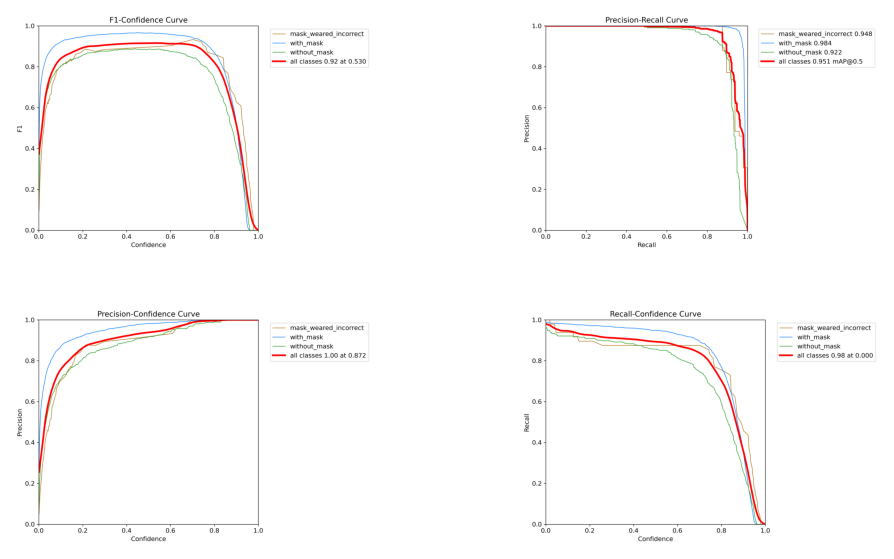

In [67]:
plt.figure(figsize=(12,7))

plt.subplot(221)
F1_curve = cv2.imread('/content/drive/MyDrive/facemask_project/demo/demo_files/runs/detect/train83/F1_curve.png')
plt.imshow(F1_curve)
plt.axis('off')
plt.subplot(222)
PR_curve = cv2.imread('/content/drive/MyDrive/facemask_project/demo/demo_files/runs/detect/train83/PR_curve.png')
plt.imshow(PR_curve)
plt.axis('off')
plt.subplot(223)
P_curve = cv2.imread('/content/drive/MyDrive/facemask_project/demo/demo_files/runs/detect/train83/P_curve.png')
plt.imshow(P_curve)
plt.axis('off')
plt.subplot(224)
R_curve = cv2.imread('/content/drive/MyDrive/facemask_project/demo/demo_files/runs/detect/train83/R_curve.png')
plt.imshow(R_curve)
plt.axis('off')


(-0.5, 2999.5, 2249.5, -0.5)

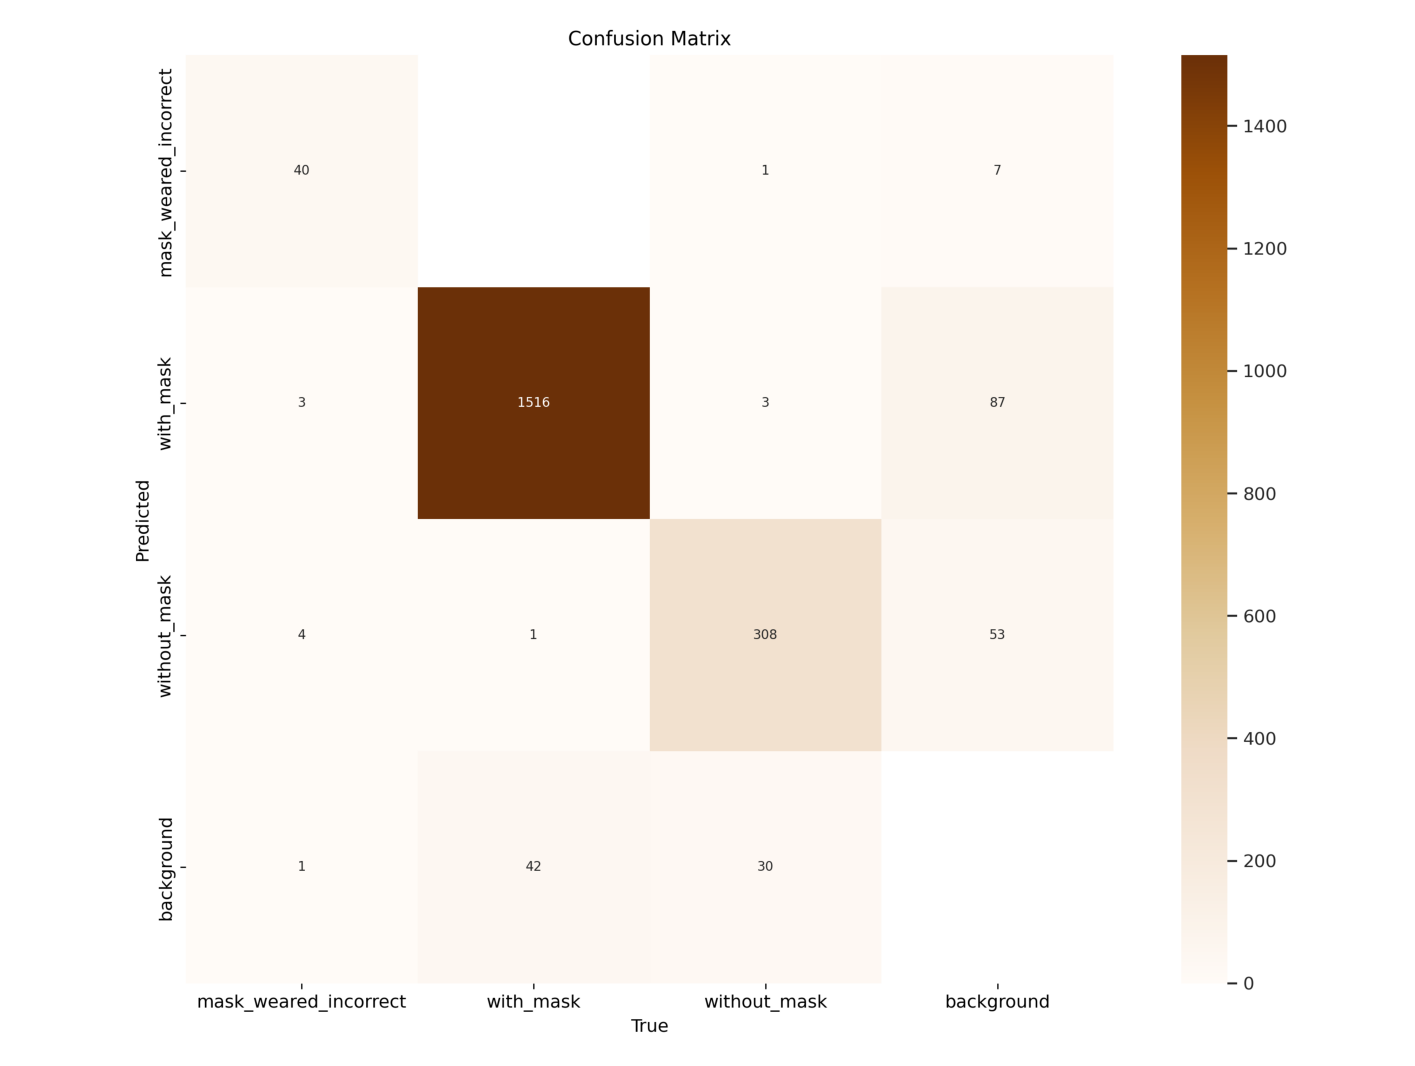

In [69]:
plt.figure(figsize=(18,18))
confusion_matrix = cv2.imread('/content/drive/MyDrive/facemask_project/demo/demo_files/runs/detect/train83/confusion_matrix.png')
plt.imshow(confusion_matrix)
plt.axis('off')

(-0.5, 1919.5, 1007.5, -0.5)

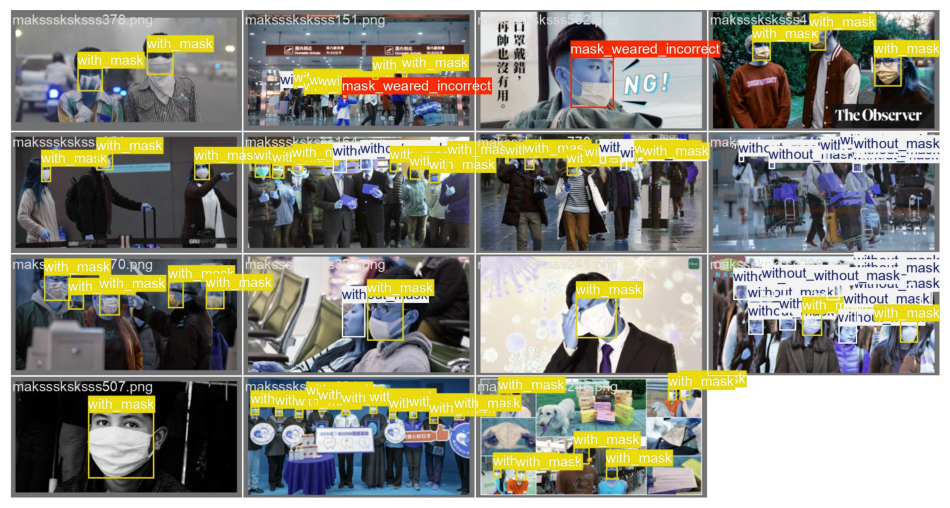

In [71]:
plt.figure(figsize=(12,12))
image = cv2.imread('/content/drive/MyDrive/facemask_project/demo/demo_files/runs/detect/train83/val_batch0_labels.jpg')
plt.imshow(image)
plt.axis('off')

In [72]:
best_model='/content/drive/MyDrive/facemask_project/demo/demo_files/runs/detect/train/weights/best.pt'
model=YOLO(best_model)

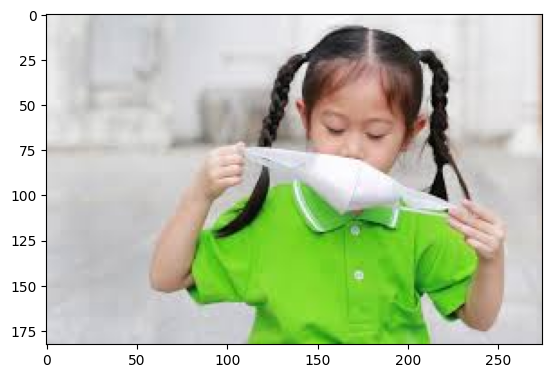

In [85]:
children_path = '/content/drive/MyDrive/facemask_project/demo/demo_files/children/child_2.jpeg'
image=cv2.imread(children_path)
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)



image 1/1 /content/drive/MyDrive/facemask_project/demo/demo_files/children/child_2.jpeg: 448x640 1 with_mask, 1 mask_weared_incorrect, 19.7ms
Speed: 3.0ms preprocess, 19.7ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


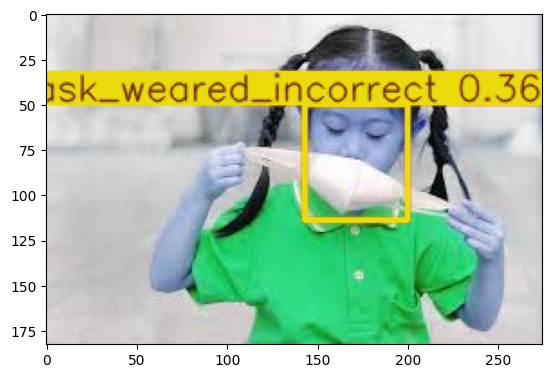

In [88]:
predictions = model(children_path)
predictions[0].boxes.conf
plt.imshow(predictions[0].plot())